# **AP157 Machine Learning Lab Assignment**
## Module A.2: Classification -- Morphological Classification of Galaxies using Decision Trees

_Instructions_: Answer each part of the assignment as completely as you can. Discuss **all** your code and results as clearly and concisely as possible.

_Scoring Criteria_: 50% - *correctness of code*; 50% - *discussion of the code and results*. Maximum score is **100 points** (Parts 1, 2, and 3 are worth 20, 40, and 40 points, respectively).

_Credits_: This assignment is based on the Week 6 module of the Coursera course "Data-driven Astronomy", "Exploring machine learning classification" ([link](https://www.coursera.org/learn/data-driven-astronomy/home/welcome))

### Student Information

_Full Name (Last Name, First Name)_: Mendoza, Genesis Adam\
_Student No._: 2019-05415\
_Section_: THY-TX-2

### Submission Information

_Date and Time Submitted (most recent upload)_: 18/02/2024 - 4:55 AM

**HONOR PLEDGE** I affirm that I have upheld the highest principles of honesty and integrity in my academic work and that this lab assignment is my own work.

**Sign here with your full name: GENESIS ADAM D. MENDOZA**

### Grading Information (c/o Instructor)

TOTAL SCORE: **[]**/100

Score breakdown:
* Part 1 - []/20
* Part 2 - []/40
* Part 3 - []/40

_Date and Time Scored (MM/DD/YYYY HH:MM AM/PM):_

For this assignment, you will work with galaxy data from the
Sloan Digital Sky Survey (SDSS). First, you need to make a copy of the binary file ```galaxy_catalogue.npy``` and save it to a folder in your **own Google Drive**. This file is available from the AP157 Machine Learning Google Drive (under the Datasets folder).

Define the directory path to the location of the file, i.e. if it is in a
folder named "AP157" under My Drive, then the file path will be "/content/drive/My Drive/AP157". Change the string variable in the code cell below, as needed:

In [1]:
file_path = "..\\datasets\\"

Now, we can load the file using $\tt numpy$'s $\tt load$ function below.





In [2]:
import numpy as np

data = np.load(file_path + 'galaxy_catalogue.npy')
data.dtype

dtype([('u-g', '<f8'), ('g-r', '<f8'), ('r-i', '<f8'), ('i-z', '<f8'), ('ecc', '<f8'), ('m4_u', '<f8'), ('m4_g', '<f8'), ('m4_r', '<f8'), ('m4_i', '<f8'), ('m4_z', '<f8'), ('petroR50_u', '<f8'), ('petroR50_r', '<f8'), ('petroR50_z', '<f8'), ('petroR90_u', '<f8'), ('petroR90_r', '<f8'), ('petroR90_z', '<f8'), ('class', '<U20')])

Print out the first couple of rows. Note that the columns are: $u-g$, $g-r$, $r-i$, $i-z$, eccentricity, $m_u$, $m_g$, $m_r$, $m_i$, $m_z$, $R_{50,u}$, $R_{50,r}$, $R_{50,z}$, $R_{90,u}$, $R_{90,r}$, $R_{90,z}$, and class.

In [3]:
data[:2]

array([(1.85765, 0.67158, 0.4231 , 0.3061 , 0.5854284, 2.251946, 2.339849, 2.380652, 2.359738, 2.395528, 3.095123, 3.818919, 3.82623 , 5.174814, 8.263009, 11.47734 , 'merger'),
       (1.74259, 0.86085, 0.44927, 0.28851, 0.7498125, 2.031566, 2.084156, 2.092272, 2.124075, 2.133154, 1.430436, 1.422533, 1.385727, 3.732712, 3.416921,  3.330347, 'merger')],
      dtype=[('u-g', '<f8'), ('g-r', '<f8'), ('r-i', '<f8'), ('i-z', '<f8'), ('ecc', '<f8'), ('m4_u', '<f8'), ('m4_g', '<f8'), ('m4_r', '<f8'), ('m4_i', '<f8'), ('m4_z', '<f8'), ('petroR50_u', '<f8'), ('petroR50_r', '<f8'), ('petroR50_z', '<f8'), ('petroR90_u', '<f8'), ('petroR90_r', '<f8'), ('petroR90_z', '<f8'), ('class', '<U20')])

#### PART 1 - Get features and targets *(20 pts.)*

Write a function ```get_features_targets``` that splits the dataset into input features and their corresponding targets. In our case, the inputs are the 4 galaxy colors ($u-g$, $g-r$, $r-i$, and $i-z$), eccentricity, $ugriz$ magnitudes, and concentrations $R_{50}/R_{90}$ in the $u$, $r$, and $z$ bands. The targets are the classes.

Here's an example of how your function should work:
```
>>> features, targets = get_features_targets(data)
>>> print("Features shape:", features.shape
>>> print("Targets shape:", targets.shape)
Features shape: (780, 13)
Targets shape: (780,)
```

In [4]:
target_cols = ['class']

def get_features_targets(array):
    feat_cols = [col for col in array.dtype.names if col not in target_cols]
    features = np.array([array[col] for col in feat_cols]).transpose()
    targets = array[[col for col in target_cols]]

    return features, targets

features, targets = get_features_targets(data)
print("Features shape:", features.shape)
print("Targets shape:", targets.shape)


Features shape: (780, 16)
Targets shape: (780,)


#### PART 2 - Train and run a decision tree model *(40 pts.)*

Write a function ```predict_class``` that will train and validate a model that predicts a galaxy's class from its photometric properties. In particular, it should do the following:
1. Split the dataset into a training and test dataset using an 80:20 split.
2. Train the input model using the training dataset features and targets.
3. Return two arrays-- the predicted and actual class of the test galaxies.

Here's an example of how your function should work:
```
import numpy as np
from sklearn.tree import DecisionTreeClassifier

data = np.load(file_path + 'galaxy_catalogue.npy')
predicted_class, actual_class = predict_class(data)

for i in np.arange(3):
   print("%d, %s, %s" & (i, predicted_class[i], actual_class[i]))
```

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

def predict_class(array):
    x_train, x_test, y_train, y_test = train_test_split(features, targets, train_size = 0.8, random_state = 0)
    model = DecisionTreeClassifier(random_state = 0)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    return y_pred, y_test

predicted_class, actual_class = predict_class(data)

for i in np.arange(10):
   print("%d, %s, %s" % (i, predicted_class[i], actual_class[i]))

0, ('spiral',), ('spiral',)
1, ('elliptical',), ('elliptical',)
2, ('merger',), ('merger',)
3, ('merger',), ('merger',)
4, ('elliptical',), ('elliptical',)
5, ('elliptical',), ('elliptical',)
6, ('spiral',), ('spiral',)
7, ('spiral',), ('spiral',)
8, ('merger',), ('merger',)
9, ('spiral',), ('spiral',)


#### PART 3 - Confusion matrix and accuracy *(40 pts.)*

1. Get the confusion matrix for your test dataset-- this is a 3 x 3 matrix with the counts for each combination of actual and predicted class. *(25 pts.)*

2. Get the test accuracy of your decision tree classifer, defined as the number of correct predictions divided by the total number of predictions. *(15 pts.)*

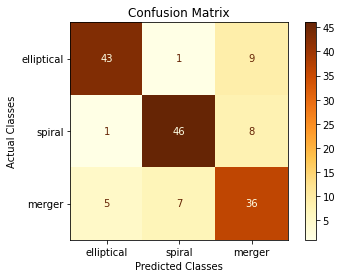

In [6]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

predicted = [predicted_class[i][0] for i in range(len(predicted_class))]
actual = [actual_class[i][0] for i in range(len(actual_class))]
conf_mat = confusion_matrix(actual, predicted, labels = ['elliptical', 'spiral', 'merger'])

conf_mat_plot = ConfusionMatrixDisplay(conf_mat, display_labels= ['elliptical', 'spiral', 'merger'])
conf_mat_plot.plot(cmap='YlOrBr')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Classes')
plt.ylabel('Actual Classes')
plt.show()

In [7]:
bool_arr = [actual[i] == predicted[i] for i in range(len(actual))]
correct_count = np.sum(bool_arr)
total_count = len(actual)
print('The test accuracy is '+str(100*correct_count/total_count)+'%')

The test accuracy is 80.12820512820512%


#### Extra

Can we improve this?

For a maximum depth of 7, the accuracy is 83.33%.


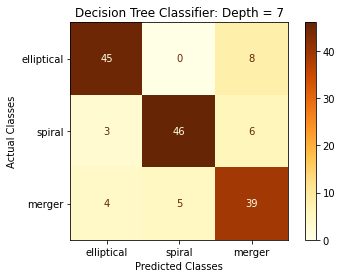

In [8]:
from sklearn.model_selection import train_test_split

#define a function that takes the dataset to be determined and the maximum depth and returns the predicted and actual value

def predict_class(array, n):
    x_train, x_test, y_train, y_test = train_test_split(features, targets, train_size = 0.8, random_state = 0)
    model = DecisionTreeClassifier(max_depth = n, random_state = 0)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    return y_pred, y_test

#define a function that takes the dataset and spits out the optimal maximum depth

def optimal_depth(array):
    n_accu = {}
    for n in range(1, 100, 1):
        predicted_class, actual_class = predict_class(array, n)
        predicted = [predicted_class[i][0] for i in range(len(predicted_class))]
        actual = [actual_class[i][0] for i in range(len(actual_class))]
        bool_arr = [actual[i] == predicted[i] for i in range(len(actual))]
        correct_count = np.sum(bool_arr)
        total_count = len(actual)
        n_accu[n] = 100*correct_count/total_count
    
    max_n = max(n_accu, key = n_accu.get)
    return max_n, n_accu[max_n]

n_val, accu = optimal_depth(data)        
print('For a maximum depth of {}, the accuracy is {:.2f}%.'.format(n_val, accu))

predicted_class, actual_class = predict_class(data, n_val)
predicted = [predicted_class[i][0] for i in range(len(predicted_class))]
actual = [actual_class[i][0] for i in range(len(actual_class))]

conf_mat = confusion_matrix(actual, predicted, labels = ['elliptical', 'spiral', 'merger'])
conf_mat_plot = ConfusionMatrixDisplay(conf_mat, display_labels= ['elliptical', 'spiral', 'merger'])
conf_mat_plot.plot(cmap='YlOrBr')
plt.title('Decision Tree Classifier: Depth = {}'.format(n_val))
plt.xlabel('Predicted Classes')
plt.ylabel('Actual Classes')
plt.show()

We can do the same thing for a Random Forest Classifier. 

For 23 estimators, the accuracy is 89.74%.


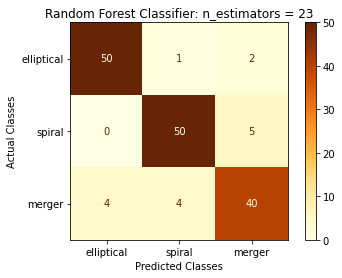

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

def predict_class(array, n):
    x_train, x_test, y_train, y_test = train_test_split(features, targets, train_size = 0.8, random_state = 0)
    model = RandomForestClassifier(n_estimators = n, random_state = 0)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    return y_pred, y_test

def optimal_estimator(array):
    n_accu = {}
    for n in range(1, 100, 1):
        predicted_class, actual_class = predict_class(array, n)
        predicted = [predicted_class[i][0] for i in range(len(predicted_class))]
        actual = [actual_class[i][0] for i in range(len(actual_class))]
        bool_arr = [actual[i] == predicted[i] for i in range(len(actual))]
        correct_count = np.sum(bool_arr)
        total_count = len(actual)
        n_accu[n] = 100*correct_count/total_count
    
    max_n = max(n_accu, key = n_accu.get)
    return max_n, n_accu[max_n]

n_val, accu = optimal_estimator(data)        
print('For {} estimators, the accuracy is {:.2f}%.'.format(n_val, accu))

predicted_class, actual_class = predict_class(data, n_val)
predicted = [predicted_class[i][0] for i in range(len(predicted_class))]
actual = [actual_class[i][0] for i in range(len(actual_class))]

conf_mat = confusion_matrix(actual, predicted, labels = ['elliptical', 'spiral', 'merger'])
conf_mat_plot = ConfusionMatrixDisplay(conf_mat, display_labels= ['elliptical', 'spiral', 'merger'])
conf_mat_plot.plot(cmap='YlOrBr')
plt.title('Random Forest Classifier: n_estimators = {}'.format(n_val))
plt.xlabel('Predicted Classes')
plt.ylabel('Actual Classes')
plt.show()

We can redo the whole problem in `pandas`.

In [10]:
import pandas as pd

data_pd = pd.DataFrame(data)
data_pd.head()

C:\Users\PC\AppData\Local\Temp/ipykernel_15896/4039596571.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


,u-g,g-r,r-i,i-z,ecc,m4_u,m4_g,m4_r,m4_i,m4_z,petroR50_u,petroR50_r,petroR50_z,petroR90_u,petroR90_r,petroR90_z,class
0,1.85765,0.67158,0.42310,0.30610,0.585428,2.251946,2.339849,2.380652,2.359738,2.395528,3.095123,3.818919,3.826230,5.174814,8.263009,11.477340,merger
1,1.74259,0.86085,0.44927,0.28851,0.749812,2.031566,2.084156,2.092272,2.124075,2.133154,1.430436,1.422533,1.385727,3.732712,3.416921,3.330347,merger
2,2.10697,0.96710,0.56810,0.33747,0.630089,1.992887,2.450746,2.473116,2.465324,2.438683,3.099957,3.623704,3.463300,9.110857,8.354343,11.265390,merger
3,1.22840,0.60446,0.39049,0.28913,0.668999,2.056115,2.182252,2.309510,2.391414,2.472397,3.627267,4.063471,3.717708,9.580675,12.202420,11.826220,merger
4,1.80792,0.78124,0.45528,0.35067,0.500170,2.259167,2.194723,2.264567,2.334713,2.352568,3.256751,3.153533,2.254511,9.206746,9.790146,6.636931,merger


In [11]:
data_pd.describe()

,u-g,g-r,r-i,i-z,ecc,m4_u,m4_g,m4_r,m4_i,m4_z,petroR50_u,petroR50_r,petroR50_z,petroR90_u,petroR90_r,petroR90_z
count,780.000000,780.000000,780.000000,780.000000,780.000000,780.000000,780.000000,780.000000,780.000000,780.000000,780.000000,780.000000,780.000000,780.000000,780.000000,780.000000
mean,1.633556,0.751285,0.390027,0.256630,0.713827,-36.228336,-10.499354,-23.280043,-36.084795,-48.904677,-46.026529,4.897747,-34.147368,-38.642822,12.625589,-27.091879
std,0.680241,0.333986,0.094902,0.434369,0.171010,619.454396,358.104842,506.113635,619.462662,714.833597,715.052758,5.647410,619.598004,715.634265,9.482342,620.075967
min,-8.202350,-4.708600,-0.630590,-7.698340,0.226894,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,0.617535,-9999.000000,-9999.000000,1.031904,-9999.000000
25%,1.333080,0.620432,0.353687,0.227997,0.592427,2.124926,2.238136,2.303345,2.327275,2.329166,2.896251,2.884019,2.553682,7.056056,8.101448,7.145191
50%,1.701755,0.789610,0.400985,0.294780,0.744386,2.269386,2.351759,2.380019,2.394285,2.390121,4.391504,3.929862,3.449929,10.743275,10.509180,9.423079
75%,1.914082,0.905282,0.430363,0.326920,0.852673,2.390789,2.420319,2.439145,2.448875,2.449683,6.148377,5.450743,4.832378,14.975497,14.321407,13.388955
max,10.624040,1.539170,1.390840,4.879330,0.999812,26.009380,2.724017,2.737767,2.728628,2.730472,61.133380,134.394700,89.220090,112.493900,162.428100,116.535700


In [12]:
def new_get_feat_targ(array):
    target_cols = ['class']
    feat_cols = [col for col in array.columns if col not in target_cols]
    feats = array[feat_cols]
    targs = array[target_cols]
    return feats, targs

features, targets = new_get_feat_targ(data_pd)
print("Features shape:", features.shape)
print("Targets shape:", targets.shape)

Features shape: (780, 16)
Targets shape: (780, 1)


In [13]:
def predict_class_model(array, n_depth):
    x_train, x_test, y_train, y_test = train_test_split(features, targets, random_state = 0, train_size = 0.8)
    model = DecisionTreeClassifier(max_depth = n_depth, random_state = 0)
    model.fit(x_train, y_train)
    y_predict = model.predict(x_test)
    y_predict = pd.DataFrame(y_predict, index = y_test.index, columns = ['predicted'])
    return y_predict, y_test

def optimal_depth(array):
    max_accu = {}
    for depth_val in range(1, 50, 1):
        pred, true = predict_class_model(array, depth_val)
        correct = pred.predicted[pred.predicted == true['class']].count()
        total = pred.predicted.count()
        max_accu[depth_val] = 100*correct/total
    return max(max_accu, key = max_accu.get)

optim_depth = optimal_depth(data_pd)
        
def predict_class(array):
    x_train, x_test, y_train, y_test = train_test_split(features, targets, random_state = 0, train_size = 0.8)
    model = DecisionTreeClassifier(max_depth = optim_depth)
    model.fit(x_train, y_train)
    y_predict = model.predict(x_test)
    y_predict = pd.DataFrame(y_predict, index = y_test.index, columns = ['predicted'])
    return y_predict, y_test

predicted_class, actual_class = predict_class(data_pd)
comp_table = predicted_class.join(actual_class)
correct = predicted_class.predicted[predicted_class.predicted == actual_class['class']].count()
total = predicted_class.count().sum()
comp_table.head()


,predicted,class
699,spiral,spiral
327,elliptical,elliptical
210,merger,merger
14,merger,merger
413,elliptical,elliptical


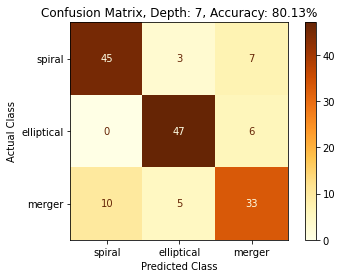

In [14]:
import matplotlib.pyplot as plt 
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

unique_vals = actual_class['class'].unique()
conf_mat = confusion_matrix(actual_class, predicted_class, labels = unique_vals)
disp = ConfusionMatrixDisplay(conf_mat, display_labels = unique_vals)
disp.plot(cmap = 'YlOrBr')
plt.xlabel('Predicted Class')
plt.ylabel('Actual Class')
plt.title('Confusion Matrix, Depth: {}, Accuracy: {:.2f}%'.format(optim_depth, 100*correct/total))
plt.show()

In [15]:
from sklearn.model_selection import RandomizedSearchCV

forest_model = RandomForestClassifier(random_state=0)

max_leaf_nodes = [node_val for node_val in range(2, 100, 1)]
max_depth = [depth for depth in range(1, 100, 1)]

random_grid = {'max_leaf_nodes': max_leaf_nodes, 'max_depth': max_depth}
n_estimators = [estim for estim in range(1, 100, 1)]

model_random = RandomizedSearchCV(
    estimator=forest_model,
    param_distributions={**random_grid, 'n_estimators': n_estimators},
    n_iter=500, cv=5, verbose=3, random_state=0, n_jobs=-1
)

model_random.fit(features, targets.values.ravel())

opt_estim = model_random.best_params_['n_estimators']
opt_nodes = model_random.best_params_['max_leaf_nodes']
opt_depth = model_random.best_params_['max_depth']

print('The optimal n_estimator is: {}'.format(opt_estim))
print('The optimal max_leaf_nodes is: {}'.format(opt_nodes))
print('The optimal max_depth is: {}'.format(opt_depth))
print('The best score given the optimum parameters is {:.2f}%'.format(100 * model_random.best_score_))


Fitting 5 folds for each of 500 candidates, totalling 2500 fits
The optimal n_estimator is: 86
The optimal max_leaf_nodes is: 85
The optimal max_depth is: 49
The best score given the optimum parameters is 85.90%


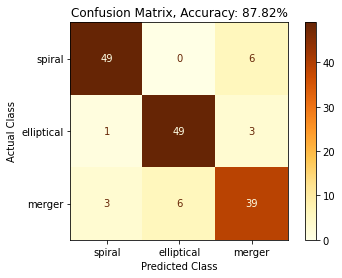

In [16]:
x_train, x_test, y_train, y_test = train_test_split(features, targets, random_state = 0, train_size = 0.8)
model = RandomForestClassifier(max_leaf_nodes = opt_nodes, n_estimators = opt_estim, max_depth = optim_depth, random_state = 0)
model.fit(x_train, y_train.values.ravel())
y_predict = model.predict(x_test)
y_predict = pd.DataFrame(y_predict, index = y_test.index, columns = ['predicted'])
correct = y_predict[y_predict.predicted == y_test['class']].size
total = y_predict.size

unique_vals = y_test['class'].unique()
conf_mat = confusion_matrix(y_test, y_predict, labels = unique_vals)
disp = ConfusionMatrixDisplay(conf_mat, display_labels = unique_vals)
disp.plot(cmap = 'YlOrBr')
plt.xlabel('Predicted Class')
plt.ylabel('Actual Class')
plt.title('Confusion Matrix, Accuracy: {:.2f}%'.format(100*correct/total))
plt.show()